# Data mining assignment 2

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('training_set_vu_DM.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [144]:
df['srch_id'].nunique() # 199795 unique searches
df['prop_id'].nunique() # 129113 unique hotels
df['position'].nunique() # 40 positions
df.count() # 4958347 rows

srch_id                        4958347
date_time                      4958347
site_id                        4958347
visitor_location_country_id    4958347
visitor_hist_starrating         251866
visitor_hist_adr_usd            252988
prop_country_id                4958347
prop_id                        4958347
prop_starrating                4958347
prop_review_score              4950983
prop_brand_bool                4958347
prop_location_score1           4958347
prop_location_score2           3867999
prop_log_historical_price      4958347
position                       4958347
price_usd                      4958347
promotion_flag                 4958347
srch_destination_id            4958347
srch_length_of_stay            4958347
srch_booking_window            4958347
srch_adults_count              4958347
srch_children_count            4958347
srch_room_count                4958347
srch_saturday_night_bool       4958347
srch_query_affinity_score       317406
orig_destination_distance

Veel missing values, verwijder alle features met meer dan 30% NA's (kan evt nog meer NA's worden, maar dat wordt wel meer imputen)

In [148]:
null_values = df.isnull().sum()
to_keep = null_values.index[np.asarray(null_values/df['srch_id'].count() < 0.30)]
df_no_na = df[to_keep]
df_no_na.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
random_bool                          0
click_bool                           0
booking_bool                         0
dtype: int64

Prop_review_score en Prop_location_score2 hebben nog NA's dus die moeten we imputen. Heb ze nu allebei ge-impute aan de hand van hun distributie, maar we kunnen misschien ook nog prop_location_score2 imputen adhv de andere location score maar weet niet echt goed hoe

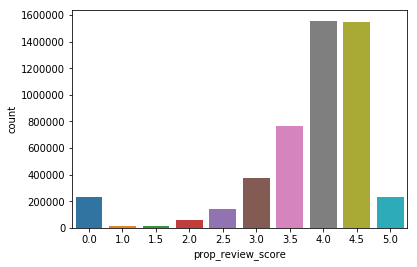

In [17]:

# data_no_na['prop_review_score'].value_counts()
# data_no_na['prop_review_score'].head()
sns.countplot(df_no_na['prop_review_score'])

In [60]:
probs = df_no_na['prop_review_score'].value_counts(normalize=True)
isnull = df_no_na['prop_review_score'].isnull()
np.random.seed(15)
df_no_na.loc[isnull, 'prop_review_score'] = np.random.choice(probs.index, size=len(df[isnull]), p=probs.values)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4.0    1559300
4.5    1549195
3.5     769161
3.0     376439
5.0     236295
0.0     233649
2.5     144087
2.0      62405
1.5      14487
1.0      13329
Name: prop_review_score, dtype: int64

In [82]:
df_no_na['prop_location_score2'] = df['prop_location_score2']
probs = df_no_na['prop_location_score2'].value_counts(normalize=True)
isnull = df_no_na['prop_location_score2'].isnull()
np.random.seed(15)
df_no_na.loc[isnull, 'prop_location_score2'] = np.random.choice(probs.index, size=len(df[isnull]), p=probs.values)
df_no_na.isnull().sum()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
click_bool                     0
booking_bool                   0
dtype: int64

Geen NA's meer nu. Is nog wel te veel data om chill mee te kunnen werken, dus heb de data naar een vijfde gedownsampled, dus van 199795 naar 40000 search id's. Is denk ik nog steeds genoeg data om goed mee te kunnen werken en we kunnen op het einde wel weer op de volledige data het model trainen

In [143]:
a = np.asarray(list(set(df_no_na['srch_id'].values))) # 199795 unique searches

np.random.seed(15)
subset_users = np.random.choice(a, size=40000, replace=False) # downsample to 40000

subset_df = df_no_na.loc[df_no_na['srch_id'].isin(subset_users)]
subset_df.info() # van 4958347 naar 996086 values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996086 entries, 86 to 4958175
Data columns (total 25 columns):
srch_id                        996086 non-null int64
date_time                      996086 non-null object
site_id                        996086 non-null int64
visitor_location_country_id    996086 non-null int64
prop_country_id                996086 non-null int64
prop_id                        996086 non-null int64
prop_starrating                996086 non-null int64
prop_review_score              996086 non-null float64
prop_brand_bool                996086 non-null int64
prop_location_score1           996086 non-null float64
prop_location_score2           996086 non-null float64
prop_log_historical_price      996086 non-null float64
position                       996086 non-null int64
price_usd                      996086 non-null float64
promotion_flag                 996086 non-null int64
srch_destination_id            996086 non-null int64
srch_length_of_stay         

In [145]:
subset_df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
count,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,9.960860e+05,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000,996086.000000
mean,166462.433337,9.987077,175.197512,173.718776,70054.459196,3.186080,3.777974,0.633380,2.882337,0.130103,4.321455,16.882795,3.165449e+02,0.217030,14021.783371,2.391396,37.871385,1.968919,0.344793,1.108642,0.507022,0.295227,0.044573,0.027825
std,96192.478407,7.671565,66.017901,68.393644,40622.828203,1.049533,1.053755,0.481882,1.533672,0.159390,1.835872,10.424519,2.608549e+04,0.412224,8090.335663,2.052430,52.883155,0.844336,0.723522,0.415502,0.499951,0.456145,0.206365,0.164471
min,11.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,83104.000000,5.000000,100.000000,100.000000,34950.000000,3.000000,3.500000,0.000000,1.790000,0.019000,4.450000,8.000000,8.525000e+01,0.000000,7120.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,166201.000000,5.000000,219.000000,219.000000,69607.000000,3.000000,4.000000,1.000000,2.770000,0.069000,4.920000,16.000000,1.227000e+02,0.000000,13570.000000,2.000000,17.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,249881.000000,14.000000,219.000000,219.000000,105184.750000,4.000000,4.500000,1.000000,4.040000,0.179500,5.320000,26.000000,1.860000e+02,0.000000,21002.000000,3.000000,49.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,332765.000000,34.000000,231.000000,230.000000,140821.000000,5.000000,5.000000,1.000000,6.980000,1.000000,6.210000,40.000000,1.972633e+07,1.000000,28407.000000,29.000000,471.000000,9.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
print(subset_df['click_bool'].value_counts(normalize=True))
print(subset_df['booking_bool'].value_counts(normalize=True))

0    0.955427
1    0.044573
Name: click_bool, dtype: float64
0    0.972175
1    0.027825
Name: booking_bool, dtype: float64


Op maar 4.4% van de hotels wordt geklikt, en 2.8% krijgt een booking

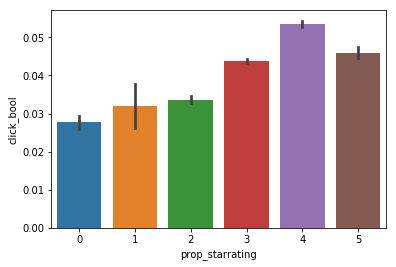

In [149]:
sns.barplot(subset_df['prop_starrating'], subset_df['click_bool'])

Er wordt het meest geklikt op een 4-sterren hotel, maar alsnog maar 5% van die hotels.

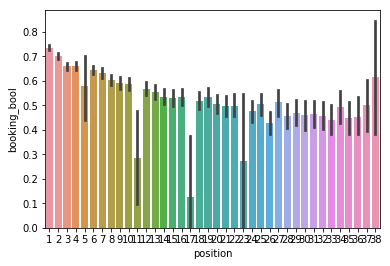

In [147]:
clicked = subset_df[subset_df['click_bool'] == 1]

sns.barplot(clicked['position'], clicked['booking_bool'])

Hogere positie = meer kans om geboekt te worden bij hotels waarop geklikt is